In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
environ=pd.read_json("./environ.json",convert_dates=True)

In [69]:
environ.head()

,humidity,precipitation,pressure,radiation,sunshine,temperature,timestamp
0,95.6,0.0,1016.3,0.0,599.2,16.1,2018-09-01 00:00:00
1,NaN,0.1,NaN,NaN,NaN,NaN,2018-09-01 00:05:00
2,95.5,0.0,1016.4,0.0,600.0,16.1,2018-09-01 00:10:00
3,NaN,0.0,NaN,NaN,NaN,NaN,2018-09-01 00:15:00
4,95.2,0.0,1016.5,0.0,598.9,16.1,2018-09-01 00:20:00


In [71]:
environ["ts"]=pd.to_datetime(environ["timestamp"],unit="ms")

In [72]:
environ=environ.set_index("timestamp")

In [73]:
environ.head()

,humidity,precipitation,pressure,radiation,sunshine,temperature,ts
timestamp,,,,,,,
2018-09-01 00:00:00,95.6,0.0,1016.3,0.0,599.2,16.1,2018-09-01 00:00:00
2018-09-01 00:05:00,NaN,0.1,NaN,NaN,NaN,NaN,2018-09-01 00:05:00
2018-09-01 00:10:00,95.5,0.0,1016.4,0.0,600.0,16.1,2018-09-01 00:10:00
2018-09-01 00:15:00,NaN,0.0,NaN,NaN,NaN,NaN,2018-09-01 00:15:00
2018-09-01 00:20:00,95.2,0.0,1016.5,0.0,598.9,16.1,2018-09-01 00:20:00


In [74]:
environ.columns

Index(['humidity', 'precipitation', 'pressure', 'radiation', 'sunshine',
       'temperature', 'ts'],
      dtype='object')

In [75]:
agg_dict={
    "temperature": "max",
    "humidity": "max",
    "sunshine": "sum",
    "radiation":"sum",
    "pressure":"sum",
    "precipitation":"sum"}

In [78]:
environ = environ.resample("1h").agg(agg_dict)

In [27]:
# environ= environ.fillna(method='ffill')

/Users/tendulkar/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tendulkar/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


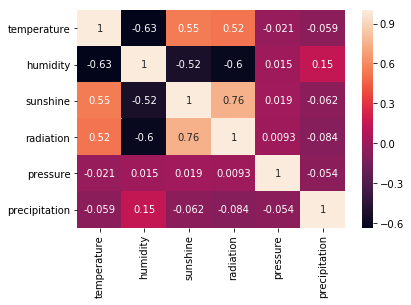

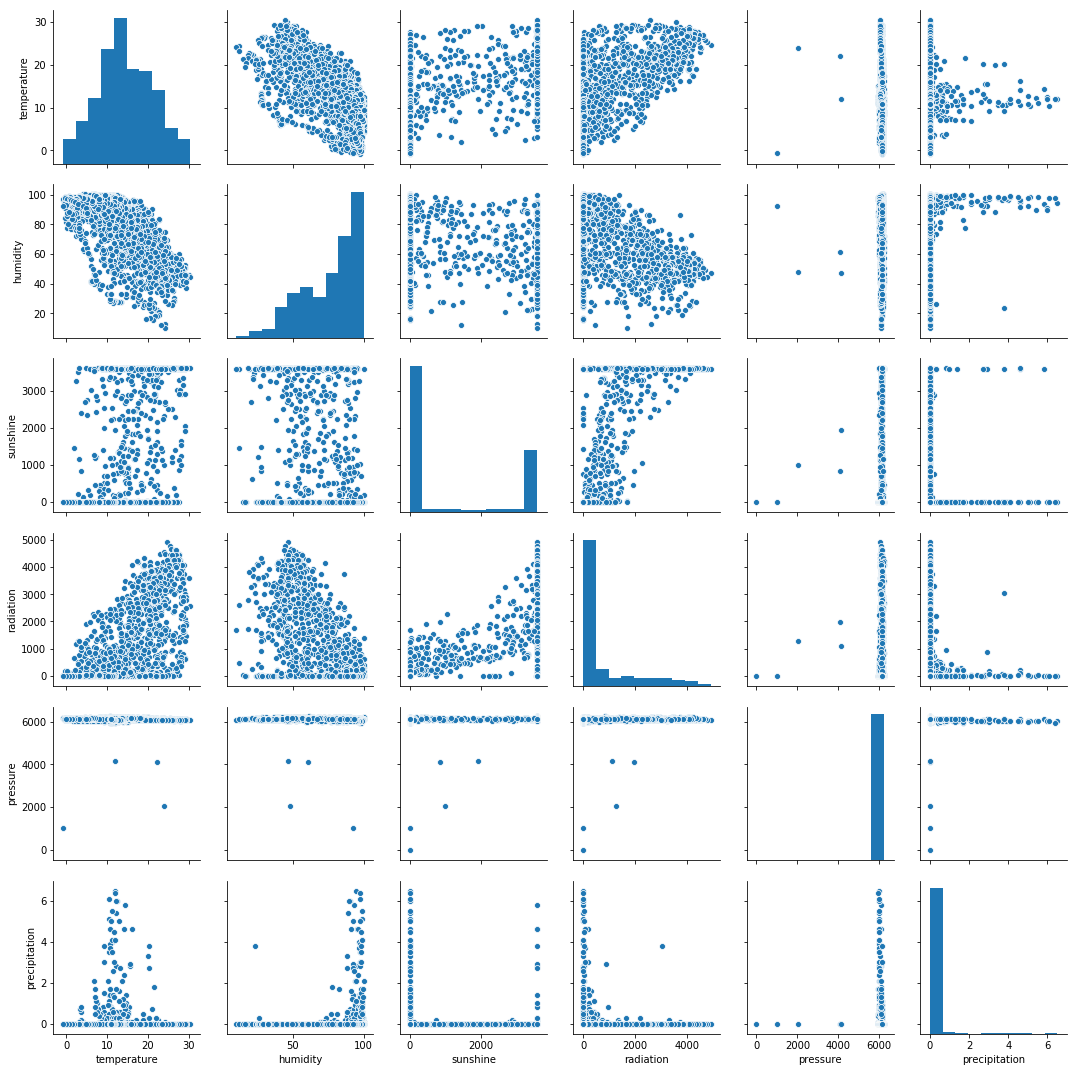

In [82]:
corr=environ.corr()
# Create a heatmap
sns.heatmap(corr, annot=True)
# Create a pairplot
sns.pairplot(environ)



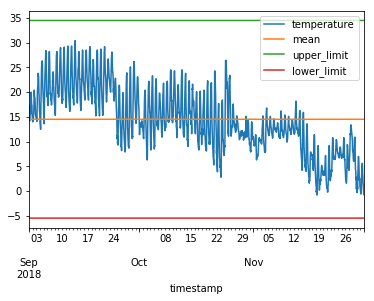

In [84]:
environ["mean"] = environ["temperature"].mean()

# Calculate upper and lower limits
environ["upper_limit"] = environ["mean"] + (environ["temperature"].std() * 3)
environ["lower_limit"] = environ["mean"] - (environ["temperature"].std() * 3)

# Plot the dataframe
environ[["temperature","mean","upper_limit","lower_limit"]].plot()

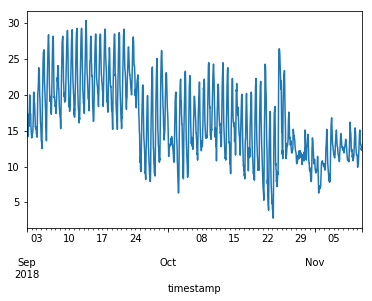

In [86]:
environ[:"2018-11-10"]["temperature"].plot()

In [87]:
from statsmodels.graphics import tsaplots

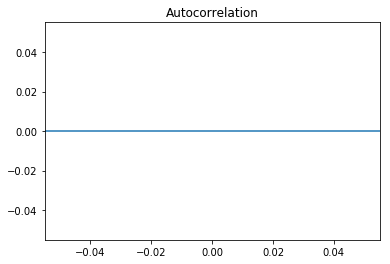

In [88]:
# Plot autocorrelation
tsaplots.plot_acf(environ["temperature"], lags=50)
plt.show()

In [93]:
environ = environ.fillna(method="ffill")

In [94]:
# Import modules
import statsmodels.api as sm

# Perform decompositon
res = sm.tsa.seasonal_decompose(environ["temperature"])

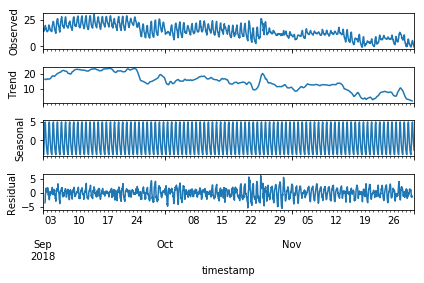

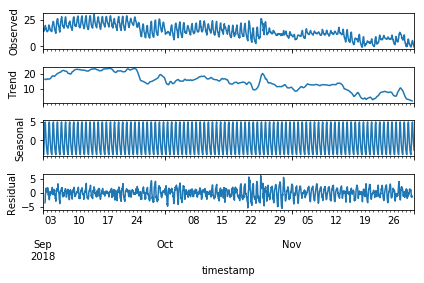

In [95]:
res.plot()

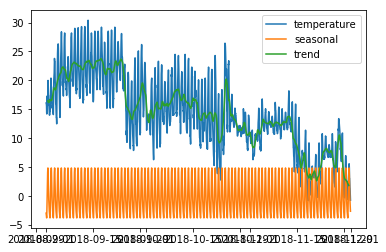

In [96]:
plt.plot(environ["temperature"])
plt.plot(res.seasonal,label="seasonal")
plt.plot(res.trend,label="trend")
plt.legend()
plt.show()

In [62]:
res.seasonal.head()

timestamp
2018-09-01 00:00:00   -2.929270
2018-09-01 01:00:00   -3.170173
2018-09-01 02:00:00   -3.529432
2018-09-01 03:00:00   -3.656006
2018-09-01 04:00:00   -3.757974
Freq: H, Name: temperature, dtype: float64

In [ ]:
x_train

In [124]:
environ["target"] = environ["precipitation"].apply(lambda x:0 if x==0 else 1)

In [129]:
environ = environ.drop(columns=["precipitation"])

In [130]:
limit_day = "2018-10-27"
train = environ[:limit_day]
test = environ[limit_day:]

In [131]:
x_train = train.drop(columns="target")
y_train = train["target"]

In [132]:
x_test = test.drop(columns="target")
y_test = test["target"]

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [137]:
print(logreg.score(x_train,y_train))
print(logreg.score(x_test,y_test))

0.9583333333333334
0.8547619047619047


In [138]:
from sklearn.preprocessing import StandardScaler

In [143]:
sc = StandardScaler()
sc.fit(environ)
# Print mean and variance
print(sc.mean_)
print(sc.var_)




[ 1.45092033e+01  7.61683150e+01  1.12272711e+03  7.11919368e+02
  6.10627578e+03  1.45128840e+01  3.44824569e+01 -5.45668886e+00
  7.32600733e-02]
[4.42380609e+01 3.91551148e+02 2.54725282e+06 1.41424271e+06
 4.17015329e+04 3.15544362e-30 0.00000000e+00 7.88860905e-31
 6.78930349e-02]


/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [145]:
environ_scaled = sc.transform(environ)

/Users/tendulkar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [146]:
environ_scaled = pd.DataFrame(environ_scaled,columns=environ.columns,index=environ.index)

In [141]:
logreg.score(x_train,y_train)

0.9583333333333334

In [150]:
from sklearn.pipeline import Pipeline

# Create Scaler and Regression objects
sc = StandardScaler()
logreg = LogisticRegression()

# Create Pipeline
pl = Pipeline([("scale", sc), ("logreg", logreg)])

# Fit the pipeline and print predictions
pl.fit(x_train, y_train)


/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [151]:
y_pred = pl.predict(x_test)

In [152]:
pl.score(x_train,y_train)

0.9568713450292398

In [153]:
pl.score(x_test,y_test)

0.8547619047619047

## Practice II

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
df=pd.read_json("./environ.json",convert_dates=True)

In [171]:
df=df.set_index("timestamp")

In [189]:
df=df["2018-10-01":"2018-10-31"]

In [218]:
light_veh=pd.read_json("./light-veh.json",convert_dates=True)
heavy_veh=pd.read_json("./heavy-veh.json",convert_dates=True)

light_veh=light_veh.set_index("timestamp")
heavy_veh=heavy_veh.set_index("timestamp")

light_veh.columns=["light_veh"]
heavy_veh.columns=["heavy_veh"]

In [219]:
traffic = pd.concat([light_veh,heavy_veh],axis=1)

## EDA

In [190]:
df.head()

,humidity,precipitation,pressure,radiation,sunshine,temperature
timestamp,,,,,,
2018-10-01 00:00:00,80.7,0.0,1013.4,0.0,0.0,11.8
2018-10-01 00:05:00,80.7,0.0,1013.4,0.0,0.0,11.8
2018-10-01 00:10:00,81.0,0.0,1013.2,0.0,0.0,11.6
2018-10-01 00:15:00,81.0,0.0,1013.2,0.0,0.0,11.6
2018-10-01 00:20:00,79.7,0.0,1013.1,0.0,0.0,11.9


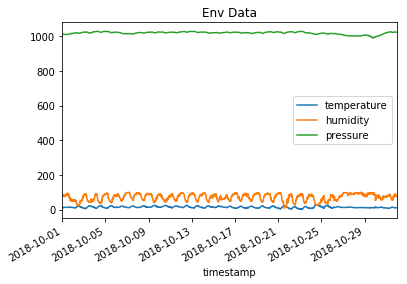

In [191]:
cols = ["temperature", "humidity", "pressure"]
df[cols].plot(title="Env Data")
plt.xlabel="time"
plt.show()

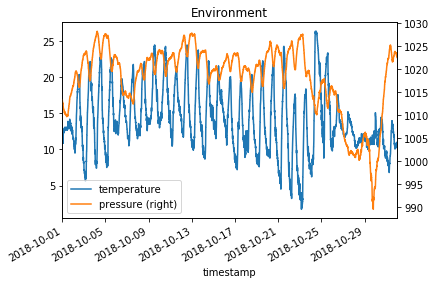

In [192]:
df[["temperature","pressure"]].plot(title="Environment", secondary_y="pressure")
plt.ylabel="pressure"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c36609c88>,
      dtype=object)

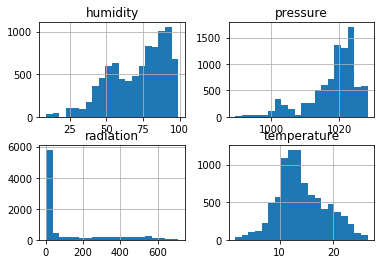

In [193]:
cols = ["temperature", "humidity", "pressure", "radiation"]
df[cols].hist(bins=20)

## Cleaning Data

### Dealing with missing data

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8920 entries, 2018-10-01 00:00:00 to 2018-10-31 23:55:00
Data columns (total 6 columns):
humidity         8920 non-null float64
precipitation    8920 non-null float64
pressure         8920 non-null float64
radiation        8920 non-null float64
sunshine         8920 non-null float64
temperature      8920 non-null float64
dtypes: float64(6)
memory usage: 487.8 KB


In [195]:
df=df.fillna(method="ffill")

In [196]:
df.isna().sum()

humidity         0
precipitation    0
pressure         0
radiation        0
sunshine         0
temperature      0
dtype: int64

In [197]:
cols=["temperature","humidity"]

In [198]:
df_1 = df[cols]

In [199]:
df_res = df_1.resample("10min").last()

In [200]:
df_res.isna().sum()

temperature    2
humidity       2
dtype: int64

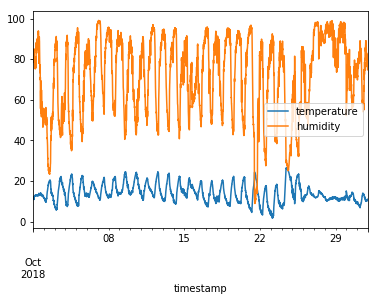

In [201]:
df_res.plot()

### Gather minimalistic incremental data


## Prepare and visualize incremental data


### Data Preparation

1. Pivot Table
2. df.diff(1)
3. df.pct_change()

### Combining datasources for further analysis



In [202]:
cols=["temperature","sunshine"]
df_2=df[cols]

In [203]:
df_2.head()

,temperature,sunshine
timestamp,,
2018-10-01 00:00:00,11.8,0.0
2018-10-01 00:05:00,11.8,0.0
2018-10-01 00:10:00,11.6,0.0
2018-10-01 00:15:00,11.6,0.0
2018-10-01 00:20:00,11.9,0.0


### Resample or fillna()

In [204]:
agg_dict = {"temperature":"max","sunshine":"sum"}

In [206]:
df_2=df_2.resample("1h").agg(agg_dict)

In [208]:
df_2.head()

,temperature,sunshine
timestamp,,
2018-10-01 00:00:00,12.1,0.0
2018-10-01 01:00:00,11.4,0.0
2018-10-01 02:00:00,12.4,0.0
2018-10-01 03:00:00,12.8,0.0
2018-10-01 04:00:00,13.0,0.0


In [209]:
df_2.fillna(method="ffill")

,temperature,sunshine
timestamp,,
2018-10-01 00:00:00,12.1,0.0
2018-10-01 01:00:00,11.4,0.0
2018-10-01 02:00:00,12.4,0.0
2018-10-01 03:00:00,12.8,0.0
2018-10-01 04:00:00,13.0,0.0
2018-10-01 05:00:00,13.0,0.0
2018-10-01 06:00:00,13.1,0.0
2018-10-01 07:00:00,12.9,0.0
2018-10-01 08:00:00,13.0,0.0


In [223]:
#Combining environ and traffic
cols = ["temperature","humidity","sunshine"]
environ = df[cols]

In [224]:
# Combine the dataframes
environ_traffic = pd.concat([environ,traffic], axis=1)

In [225]:
print(environ_traffic.head(5))

                     temperature  humidity  sunshine  light_veh  heavy_veh
timestamp                                                                 
2018-09-01 00:07:30          NaN       NaN       NaN        0.0        0.0
2018-09-01 00:22:30          NaN       NaN       NaN        0.0        0.0
2018-09-01 00:37:30          NaN       NaN       NaN        0.0        0.0
2018-09-01 00:52:30          NaN       NaN       NaN        0.0        0.0
2018-09-01 01:07:30          NaN       NaN       NaN        0.0        0.0


In [227]:
environ_traffic = environ_traffic["2018-10-01":"2018-10-31"]

In [232]:
environ_traffic = environ_traffic.resample("1h").agg({"temperature":"max","humidity":"max","sunshine":"sum","light_veh":"sum","heavy_veh":"sum"})

## Correlation

In [233]:
corr = environ_traffic.corr()
corr

,temperature,humidity,sunshine,light_veh,heavy_veh
temperature,1.000000,-0.749518,0.589080,0.369537,0.375031
humidity,-0.749518,1.000000,-0.636935,-0.323153,-0.326721
sunshine,0.589080,-0.636935,1.000000,0.378022,0.377629
light_veh,0.369537,-0.323153,0.378022,1.000000,0.998042
heavy_veh,0.375031,-0.326721,0.377629,0.998042,1.000000


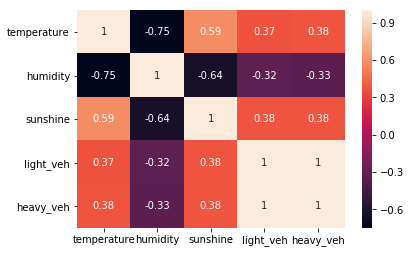

In [234]:
sns.heatmap(corr,annot=True)

Temperature and Humidity are `highly-negatively` correlated
Tem and sunshine are `higly-positively` correlated

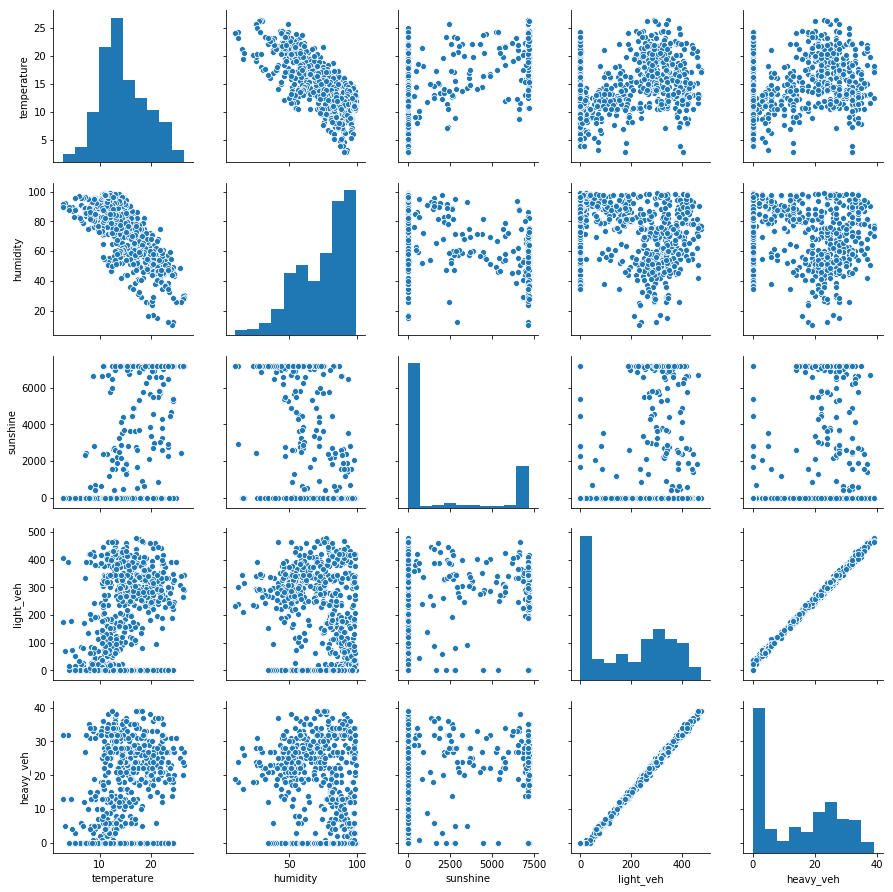

In [235]:
sns.pairplot(environ_traffic)

There's strong correlation between light vehicle and heavy vehicles

There's negative correlation between humidity and temperature 

## Outlier

In [249]:
data = pd.DataFrame(environ_traffic["temperature"],index=environ_traffic.index)


In [250]:
data["mean"] = data["temperature"].mean()


In [251]:
data["upper"] = data["mean"] + (data["temperature"].std()*3)
data["lower"] = data["mean"] - (data["temperature"].std()*3)

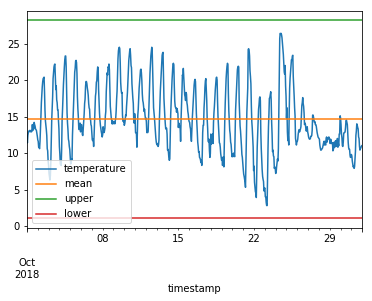

In [252]:
data.plot()

### Autocorrelation

In [253]:
from statsmodels.graphics import tsaplots

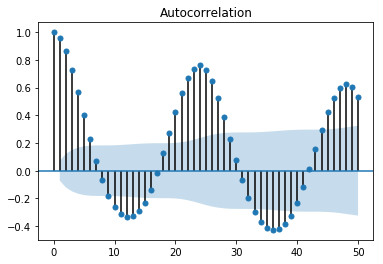

In [257]:
tsaplots.plot_acf(data["temperature"],lags=50)
plt.show()

## Seasonality &  Trends

In [258]:
import statsmodels.api as sm

In [260]:
decomp = sm.tsa.seasonal_decompose(data["temperature"])

In [262]:
decomp.seasonal.head()

timestamp
2018-10-01 00:00:00   -3.267393
2018-10-01 01:00:00   -3.617948
2018-10-01 02:00:00   -3.998504
2018-10-01 03:00:00   -4.175240
2018-10-01 04:00:00   -4.330518
Freq: H, Name: temperature, dtype: float64

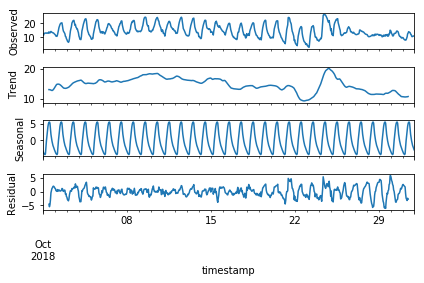

In [264]:
decomp.plot()
plt.show()

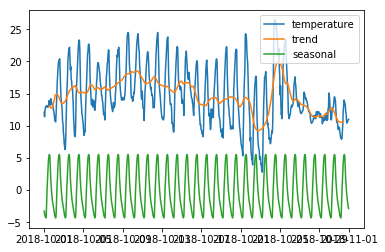

In [270]:
plt.plot(data["temperature"],label="temperature")

plt.plot(decomp.trend,label="trend")
plt.plot(decomp.seasonal,label="seasonal")
plt.legend()
plt.show()

## Prepare data for machine learning

In [271]:
# from sklearn.pipeline import Pipeline

# # Create Scaler and Regression objects
# sc = StandardScaler()
# logreg = LogisticRegression()

# # Create Pipeline
# pl = Pipeline([("scale", sc), ("logreg", logreg)])

# # Fit the pipeline and print predictions
# pl.fit(x_train, y_train)